# Homework 3-Kelcey Davis

In [45]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline
from gaussxw import *

In [46]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

## Problem 1

Heat capacity of a solid
Debye’s theory of solids gives the heat capacity of a solid at temperature T to be
CV = 9Vρk B
( T
θ D
) 3 ∫ θ D /T
0
x 4 e x
( e x − 1 ) 2 dx,
where V is the volume of the solid, ρ is the number density of atoms, k B is Boltzmann’s con-
stant, and θ D is the so-called Debye temperature, a property of solids that depends on their
density and speed of sound.


a) Write a Python function cv(T) that calculates CV for a given value of the temperature,
for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number
density of ρ = 6.022 × 1028 m − 3 and a Debye temperature of θ D = 428 K. Use Gaussian
quadrature to evaluate the integral, with N = 50 sample points. Hint: you can use the
function(s) dened in gaussxw.py (from our class exercises).


b) Use your function to make a graph of the heat capacity as a function of temperature from
T = 5 K to T = 500 K

a) Write a Python function cv(T) that calculates CV for a given value of the temperature,
for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number
density of ρ = 6.022 × 1028 m − 3 and a Debye temperature of θ D = 428 K. Use Gaussian
quadrature to evaluate the integral, with N = 50 sample points. Hint: you can use the
function(s) dened in gaussxw.py (from our class exercises).



In [115]:
def func(x):
    """
    
    """
    return (((x**4)*(np.e**x))/(((np.e**x)-1)**2))

In [127]:
def get_gauss(N, a, b, func):
    #GAUSSXW FUNCTION CALL FROM CLASS 9/21
    ###
    # calculate the sample points and weights
    x, w = gaussxw(N)
    # map the sample points and weights to the required domain
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    # perform the integral
    s = 0.0
    for k in range(N):
        s += wp[k] * func(xp[k])
    ###
    return s

In [124]:
def cv(T):
    """
    
    """
    #Defining the volume and density with correct units
    V = 1000 * ((1e-2*(u.m))**3)
    rho = 6.022e28*((u.m)**-3)
    #Grabbing the Boltzman constant from the astropy constants library
    kb = c.k_B
    thetaD = 428*u.K
    cvint = 9*V*rho*kb*(((T)/(thetaD))**3)
    cvint*= get_gauss(N = 50, a = 0, b = thetaD/T, func = func)
    return(cvint)

In [125]:
cv(5*u.K)

<Quantity 0.30989422 J / K>


b) Use your function to make a graph of the heat capacity as a function of temperature from
T = 5 K to T = 500 K

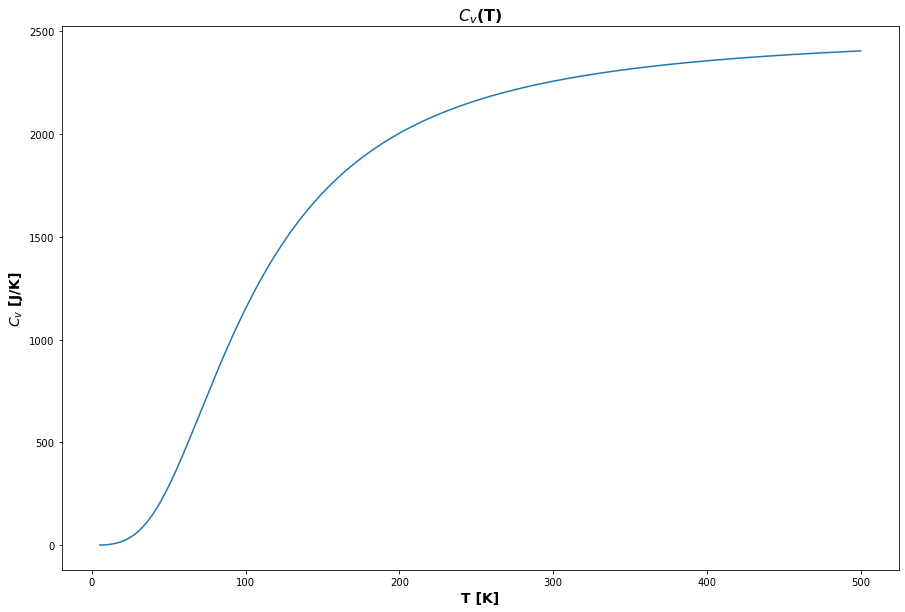

In [126]:
plt.rcParams['figure.figsize'] = (15, 10)
xs = np.arange(5,501)*u.K
ys = []
for x in xs:
    ys.append(cv(x).value)
plt.plot(xs,ys)
plt.title('$C_v$(T)')
plt.ylabel('$C_v$ [J/K]')
plt.xlabel('T [K]');

# Problem 2

Problem 2: Period of an anharmonic oscillator

The simple harmonic oscillator crops up in many places. Its behavior can be studied readily
using analytic methods and it has the important property that its period of oscillation is a
constant, independent of its amplitude, making it useful, for instance, for keeping time in
watches and clocks.
Frequently in physics, however, we also come across anharmonic oscillators, whose period
varies with amplitude and whose behavior cannot usually be calculated analytically. A general
classical oscillator can be thought of as a particle in a concave potential well. When disturbed,
the particle will rock back and forth in the well:
xV( )
x
1
The harmonic oscillator corresponds to a quadratic potential V ( x ) ∝ x 2 . Any other form gives
an anharmonic oscillator. (Thus there are many different kinds of anharmonic oscillator, de-
pending on the exact form of the potential.)
One way to calculate the motion of an oscillator is to write down the equation for the con-
servation of energy in the system. If the particle has mass m and position x, then the total
energy is equal to the sum of the kinetic and potential energies thus:
E = 1
2 m
( dx
dt
) 2
+ V ( x ) .
Since the energy must be constant over time, this equation is effectively a (nonlinear) differen-
tial equation linking x and t.
Let us assume that the potential V ( x ) is symmetric about x = 0 and let us set our anhar-
monic oscillator going with amplitude a. That is, at t = 0 we release it from rest at position
x = a and it swings back towards the origin. Then at t = 0 we have dx/dt = 0 and the
equation above reads E = V ( a ) , which gives us the total energy of the particle in terms of
the amplitude. When the particle reaches the origin for the rst time, it has gone through one
quarter of a period of the oscillator. By rearranging the equation above for dx/dt and then
integrating with respect to t from 0 to 1
4 T, it can be shown that the period T is given by
T = √ 8m
∫ a
0
dx
√V ( a ) − V ( x ) .
a) Suppose the potential is V ( x ) = x 4 and the mass of the particle is m = 1. Write a Python
function that calculates the period of the oscillator for given amplitude a using Gaussian
quadrature with N = 20 points, then use your function to make a graph of the period for
amplitudes ranging from a = 0 to a = 2.
b) You should nd that the oscillator gets faster as the amplitude increases, even though the
particle has further to travel for larger amplitude. And you should nd that the period
diverges as the amplitude goes to zero. How do you explain these results

a) Suppose the potential is V ( x ) = x 4 and the mass of the particle is m = 1. Write a Python
function that calculates the period of the oscillator for given amplitude a using Gaussian
quadrature with N = 20 points, then use your function to make a graph of the period for
amplitudes ranging from a = 0 to a = 2.


In [178]:
def get_gaussV(N, a, b, func):
    #GAUSSXW FUNCTION CALL FROM CLASS 9/21
    ###
    # calculate the sample points and weights
    x, w = gaussxw(N)
    # map the sample points and weights to the required domain
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    # perform the integral
    s = 0.0
    for k in range(N):
        s += wp[k] * vfunc(xp[k], A = b)
    ###
    return s

In [179]:
def V(x):
    return x**4

In [180]:
def vfunc(x,A):
    return((1)/np.sqrt(V(A) - V(x)))

In [181]:
def T(A):
    m = 1
    intgrl = get_gaussV(N = 20, a = 0, b = A, func = vfunc)
    return np.sqrt(8*m)*intgrl

In [182]:
T(1)

3.648094084043217

<ipython-input-180-970b641dbe76>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return((1)/np.sqrt(V(A) - V(x)))
<ipython-input-178-e08b25b38c4a>:12: RuntimeWarning: invalid value encountered in double_scalars
  s += wp[k] * vfunc(xp[k], A = b)


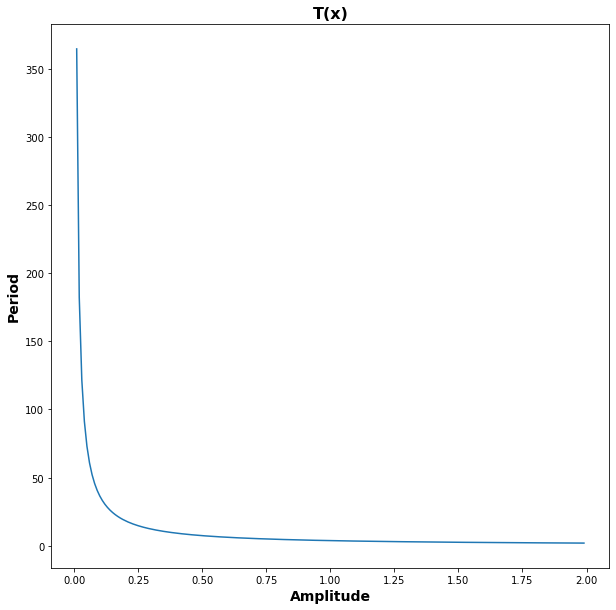

In [183]:
plt.rcParams['figure.figsize'] = (10, 10)
xs = np.arange(0,2,.01)
ys = []
for x in xs:
    ys.append(T(x))
plt.plot(xs,ys)

plt.title('T(x)')
plt.xlabel('Amplitude')
plt.ylabel('Period');

b) You should nd that the oscillator gets faster as the amplitude increases, even though the
particle has further to travel for larger amplitude. And you should nd that the period
diverges as the amplitude goes to zero. How do you explain these results

# Problem 3

Problem 3: The Stefan–Boltzmann constant

The Planck theory of thermal radiation tells us that in the (angular) frequency interval ω to
ω + dω, a black body of unit area radiates electromagnetically an amount of thermal energy
per second equal to I ( ω ) dω, where
I ( ω ) =  ̄h
4π 2 c 2
ω 3
( e  ̄hω/k B T − 1 ) .
Here  ̄h is Planck’s constant over 2π, c is the speed of light, and k B is Boltzmann’s constant.
Integrating over frequency, it can be shown that the total energy per unit area radiated by a
black body is
W = k 4
B T 4
4π 2 c 2  ̄h 3
∫ ∞
0
x 3
e x − 1 dx.
2
a) Write a program to evaluate the integral in this expression. Explain what method you
used, and how accurate you think your answer is.
b) Even before Planck gave his theory of thermal radiation around the turn of the 20th cen-
tury, it was known that the total energy W given off by a black body per unit area per
second followed Stefan’s law: W = σT 4 , where σ is the Stefan–Boltzmann constant. Use
your value for the integral above to compute a value for the Stefan–Boltzmann constant
(in SI units) to three signicant gures. Check your result against the known value, which
you can nd in books or on-line. You should get good agreement

a) Write a program to evaluate the integral in this expression. Explain what method you
used, and how accurate you think your answer is.


From numerical integration in class:

$I = \int_{0}^{\infty} f(x) \,dx $

$z = \frac{x}{1+x}$

$x = \frac{z}{1-z}$

$dx = \frac{dz}{(1-z)^2}$

$I = \int_{0}^{1} f(\frac{z}{1-z}) \, \frac{dz}{(1-z)^2}$

now we have a bound integral and we can use gaussian quadrature to evaluate it.

$W \approx \int_{0}^{\infty} \frac{x^3}{e^x -1} \,dx $

$f(x) = \frac{x^3}{e^x -1}$


$W \approx \int_{0}^{1} \frac{(\frac{z}{1-z})^3}{e^(\frac{z}{1-z}) -1} \frac{1}{(1-z)^2} \,dz $

In [136]:
def funcz(z):
    """
    
    """
    return(((((z)/(1-z))**3)/((np.e**((z)/(1-z)))-1))*((1)/((1-z)**2)))

In [148]:
W = get_gauss(N = 20, a = 0, b = 1, func = funcz)
print(W)

6.493242550961994


Explain what method you
used, and how accurate you think your answer is.


b) Even before Planck gave his theory of thermal radiation around the turn of the 20th cen-
tury, it was known that the total energy W given off by a black body per unit area per
second followed Stefan’s law: W = σT 4 , where σ is the Stefan–Boltzmann constant. Use
your value for the integral above to compute a value for the Stefan–Boltzmann constant
(in SI units) to three signicant gures. Check your result against the known value, which
you can nd in books or on-line. You should get good agreement

$W = \frac{k_B^4 T^4}{4 \pi^2c^2 \hbar^3 }\int_{0}^{\infty} \frac{x^3}{e^x -1} \,dx  = \sigma T^4$

$\frac{k_B^4 }{4 \pi^2c^2 \hbar^3 }\int_{0}^{\infty} \frac{x^3}{e^x -1} \,dx  = \sigma $

In [158]:
sigma = W * (c.k_B **4)/(4 * (np.pi**2) * (c.c**2)* (c.hbar**3))
print('Our calculated Stephan-Boltzman constant is:')
sigma.to((u.W)/(u.m**2 * u.K**4))

Our calculated Stephan-Boltzman constant is:


<Quantity 5.66976594e-08 W / (K4 m2)>

In [157]:
print('The true Stephan-Boltzman constant is:')
c.sigma_sb

The true Stephan-Boltzman constant is:


<<class 'astropy.constants.codata2018.CODATA2018'> name='Stefan-Boltzmann constant' value=5.6703744191844314e-08 uncertainty=0.0 unit='W / (K4 m2)' reference='CODATA 2018'>

# Problem 4

Problem 4: Quantum uncertainty in the harmonic oscillator


In units where all the constants are 1, the wavefunction of the nth energy level of the one-
dimensional quantum harmonic oscillator—i.e., a spinless point particle in a quadratic poten-
tial well—is given by
ψn ( x ) = 1
√2 n n! √ π e − x 2 /2 Hn ( x ) ,
for n = 0 . . . ∞, where Hn ( x ) is the nth Hermite polynomial. Hermite polynomials satisfy a
relation somewhat similar to that for the Fibonacci numbers, although more complex:
Hn + 1 ( x ) = 2xHn ( x ) − 2nHn − 1 ( x ) .
The rst two Hermite polynomials are H0 ( x ) = 1 and H1 ( x ) = 2x.
a) Write a user-dened function H(n,x) that calculates Hn ( x ) for given x and any integer
n ≥ 0. Use your function to make a plot that shows the harmonic oscillator wavefunc-
tions for n = 0, 1, 2, and 3, all on the same graph, in the range x = − 4 to x = 4. Hint:
There is a function factorial in the math package that calculates the factorial of an inte-
ger.
b) Make a separate plot of the wavefunction for n = 30 from x = − 10 to x = 10. Hint: If
your program takes too long to run in this case, then you’re doing the calculation wrong—
the program should take only a second or so to run.
c) The quantum uncertainty of a particle in the nth level of a quantum harmonic oscillator
can be quantied by its root-mean-square position √ ⟨ x 2 ⟩ , where
⟨ x 2 ⟩ =
∫ ∞
− ∞
x 2 | ψn ( x )| 2 dx.
Write a program that evaluates this integral using Gaussian quadrature on 100 points
and then calculates the uncertainty (i.e., the root-mean-square position of the particle) for
a given value of n. Use your program to calculate the uncertainty for n = 5. You should
get an answer in the vicinity of √ ⟨ x 2 ⟩ = 2.3.



a) Write a user-dened function H(n,x) that calculates Hn ( x ) for given x and any integer
n ≥ 0. Use your function to make a plot that shows the harmonic oscillator wavefunc-
tions for n = 0, 1, 2, and 3, all on the same graph, in the range x = − 4 to x = 4. Hint:
There is a function factorial in the math package that calculates the factorial of an inte-
ger.



In [356]:
def wave_func(n, x):
    return ((1)/(np.sqrt((2**n)*(np.math.factorial(n))*(np.sqrt(np.pi)))))*(np.e**(-1*(x**2)*0.5))*(h(n,x))

In [384]:
def h(n,x):
    n =int(n)
    if n == 0:
        h0 = 1
        return h0
    elif n == 1:
        h0 = 2*x
        return h0
    else:
        h0 =((2*x*h(n-1,x)) - (2*(n-1)*h(n-2,x)))
    return h0

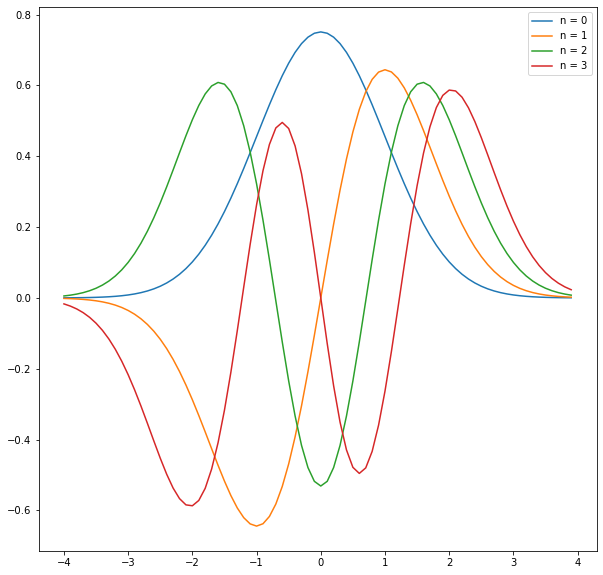

In [385]:
xs = np.arange(-4,4,0.1)
ns = np.arange(0,4)
for n in ns:
    psis = []
    for x in xs:
        psis.append(wave_func(n,x))
    plt.plot(xs, psis, label = f'n = {n}')
plt.legend();

b) Make a separate plot of the wavefunction for n = 30 from x = − 10 to x = 10. Hint: If
your program takes too long to run in this case, then you’re doing the calculation wrong—
the program should take only a second or so to run.



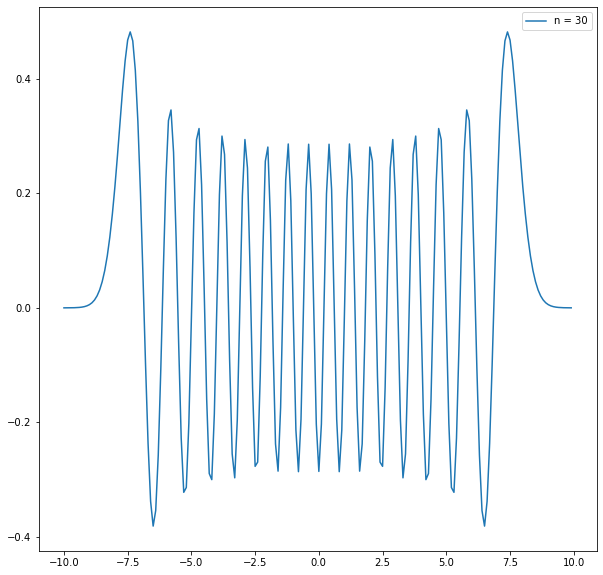

In [386]:
xs = np.arange(-10,10,0.1)
n = 30
psis = []
for x in xs:
    psis.append(wave_func(n,x))
plt.plot(xs, psis, label = f'n = {n}')
plt.legend();

c) The quantum uncertainty of a particle in the nth level of a quantum harmonic oscillator
can be quantied by its root-mean-square position √ ⟨ x 2 ⟩ , where
⟨ x 2 ⟩ =
∫ ∞
− ∞
x 2 | ψn ( x )| 2 dx.
Write a program that evaluates this integral using Gaussian quadrature on 100 points
and then calculates the uncertainty (i.e., the root-mean-square position of the particle) for
a given value of n. Use your program to calculate the uncertainty for n = 5. You should
get an answer in the vicinity of √ ⟨ x 2 ⟩ = 2.3.

$<x>^2 = \int_{-\infty}^{\infty} x^2 |\psi(x)|^2 \,dx$

From numerical integration in class:

$I = \int_{0}^{\infty} f(x) \,dx $

$z = \frac{x}{1+x}$

$x = \frac{z}{1-z}$

$dx = \frac{dz}{(1-z)^2}$

$I = \int_{0}^{1} f(\frac{z}{1-z}) \, \frac{dz}{(1-z)^2}$

$f(x) = x^2 |\psi(x)|^2 $


- even function times an even function, symetrical about x=0 so we can just double the integral from 0 to infinity.


$I = 2 \int_{0}^{1} (\frac{z}{1-z})^2 |\psi(\frac{z}{1-z})|^2 \, \frac{dz}{(1-z)^2}$



In [394]:
def funcp(z):
    n = 5
    x = ((z)/(1-z))
    return ((((z)/(1-z))**2)*(abs(wave_func(n, x))**2))*((1)/((1-z)**2))

In [398]:
I = np.sqrt(2*get_gauss(N = 100, a = 0, b = 1, func = funcp))
print(f'Our root mean square value is {round(I, 3)} which agrees with the predicted value of 2.3.')

Our root mean square value is 2.345 which agrees with the predicted value of 2.3.


# Problem 5

Problem 5: Electric eld of a charge distribution
Suppose we have a distribution of charges and we want to calculate the resulting electric eld.
One way to do this is to rst calculate the electric potential φ and then take its gradient. For a
point charge q at the origin, the electric potential at a distance r from the origin is φ = q/4πε 0 r
and the electric eld is E = −∇ φ.
3
a) You have two charges, of ± 1 C, 10 cm apart. Calculate the resulting electric potential on
a 1 m × 1 m square plane surrounding the charges and passing through them. Calculate
the potential at 1 cm spaced points in a grid and make a visualization on the screen of the
potential using a density plot.
b) Now calculate the partial derivatives of the potential with respect to x and y and hence
nd the electric eld in the xy plane. Make a visualization of the eld also. This is a little
trickier than visualizing the potential, because the electric eld has both magnitude and
direction. One way to do it might be to make two density plots, one for the magnitude,
and one for the direction, the latter using the “hsv” color scheme, which is a rainbow
scheme that passes through all the colors but starts and ends with the same shade of red,
which makes it suitable for representing things like directions or angles that go around
the full circle and end up where they started. A more sophisticated visualization might
use matplotlib’s quiver function, drawing a grid of arrows with direction and length
chosen to represent the eld

a) You have two charges, of ± 1 C, 10 cm apart. Calculate the resulting electric potential on
a 1 m × 1 m square plane surrounding the charges and passing through them. Calculate
the potential at 1 cm spaced points in a grid and make a visualization on the screen of the
potential using a density plot.


$\phi = \frac{q}{4 \pi \epsilon_0 r}$

$ E  = - \nabla \phi$

if r1 is the distance from the positive charge and r2 is the distance from the negative charge:


$\phi_{Tot} = \frac{+1C}{4 \pi \epsilon_0 r_1} + \frac{-1C}{4 \pi \epsilon_0 r_2}$

In [490]:
N = 100
xspan = np.linspace(-50,50,N)
yspan = np.linspace(-50,50,N)
matrix = np.zeros([N,N])
x1 = 0
y1 = 5
x2 = 0
y2 = -5
for xi, x in enumerate(xspan):
    for yi, y in enumerate(yspan):
        dist1 = np.sqrt(((x-x1)**2) + ((y-y1)**2))
        dist2 = np.sqrt(((x-x2)**2) + ((y-y2)**2))
        potential1 = (1*u.C)/(4 * c.eps0 * np.pi * dist1*(u.m*1e-2))
        potential2 = (-1*u.C)/(4 * c.eps0 * np.pi * dist2*(u.m*1e-2))
        matrix[xi, yi] = potential1.value + potential2.value

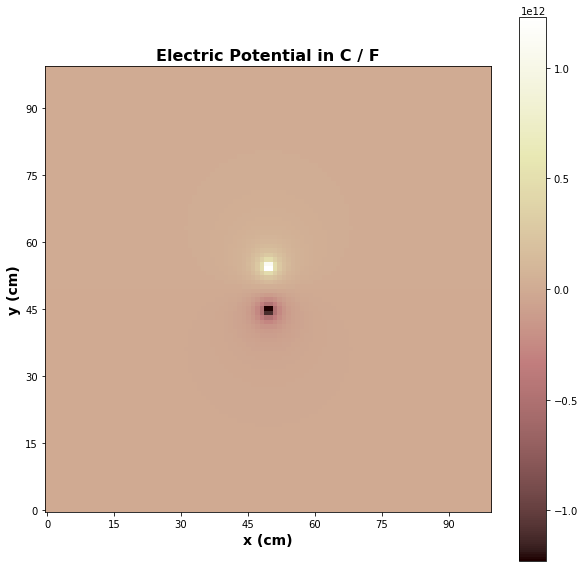

In [495]:
plt.imshow(matrix.T, cmap = 'pink', origin = 'lower')
plt.colorbar()
plt.title(f'Electric Potential in {potential1.unit}')
plt.xticks(np.arange(0,100, 15))
plt.yticks(np.arange(0,100, 15))
plt.ylabel('y (cm)')
plt.xlabel('x (cm)');

b) Now calculate the partial derivatives of the potential with respect to x and y and hence
nd the electric eld in the xy plane. Make a visualization of the eld also. This is a little
trickier than visualizing the potential, because the electric eld has both magnitude and
direction. One way to do it might be to make two density plots, one for the magnitude,
and one for the direction, the latter using the “hsv” color scheme, which is a rainbow
scheme that passes through all the colors but starts and ends with the same shade of red,
which makes it suitable for representing things like directions or angles that go around
the full circle and end up where they started. A more sophisticated visualization might
use matplotlib’s quiver function, drawing a grid of arrows with direction and length
chosen to represent the eld

if r1 is the distance from the positive charge and r2 is the distance from the negative charge:


$ E  = - \nabla \phi$

if r1 is the distance from the positive charge and r2 is the distance from the negative charge:


$\phi_{Tot} = \frac{+1C}{4 \pi \epsilon_0 r_1} + \frac{-1C}{4 \pi \epsilon_0 r_2}$

$\phi_{tot} = \frac{1C}{4 \pi \epsilon_0}[ \frac{1}{r_1} - \frac{1}{r_2}]$

$ E  = - \nabla \phi = -\frac{\partial \phi}{\partial r_1} \hat{r_1} - \frac{\partial \phi}{\partial r_2} \hat{r_2}$

$\frac{\partial \phi}{\partial r_1} = \frac{1C}{4 \pi \epsilon_0} * \frac{-1}{r_1 ^2}$

$\frac{\partial \phi}{\partial r_2} = \frac{1C}{4 \pi \epsilon_0} * \frac{1}{r_2 ^2}$

$E = \frac{1C}{4 \pi \epsilon_0}[\frac{\hat{r_1}}{r_1^2} - \frac{\hat{r_2}}{r_2^2}]$

for a given point then,

$E_{mag} = \sqrt(\frac{1C}{4 \pi \epsilon_0}[{(\frac{1}{r_1^2})^2} + {(\frac{-1}{r_1^2})^2}])$

I am choosing to use streamplot since this seems more aproproate than quiver which was suggested. I am just following the function doccumentation here:

https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html

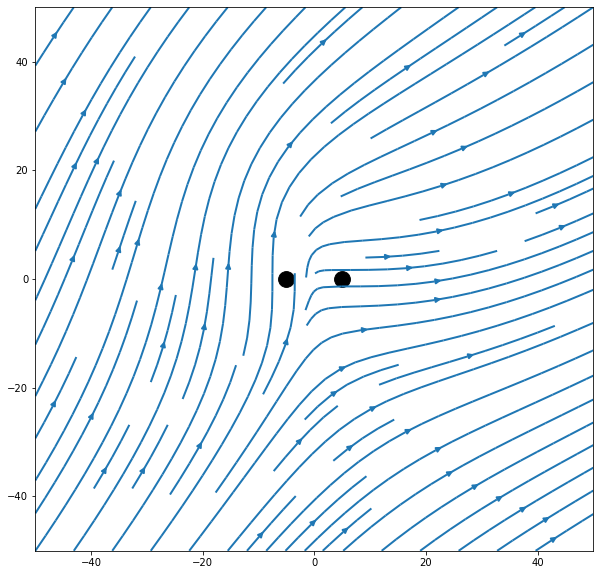

In [489]:
w = 50
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
x1 = 5
y1 = 0

x2 = -5
y2 = 0

r1 = np.sqrt(((X-x1)**2) + ((Y-y1)**2))
r2 = np.sqrt(((X-x2)**2) + ((Y-y2)**2))
U = (((1*u.C)/(4 * np.pi * c.eps0)) * ((1)/(((r1**2)*(u.m*1e-2))**2))).value
V = (((-1*u.C)/(4 * np.pi * c.eps0)) * ((-1)/(((r2**2)*(u.m*1e-2))**2))).value
plt.streamplot(X, Y, U, V, linewidth=2)
plt.scatter([x1, x2], [y1, y2], c = 'k', marker = '.', s = 1000);

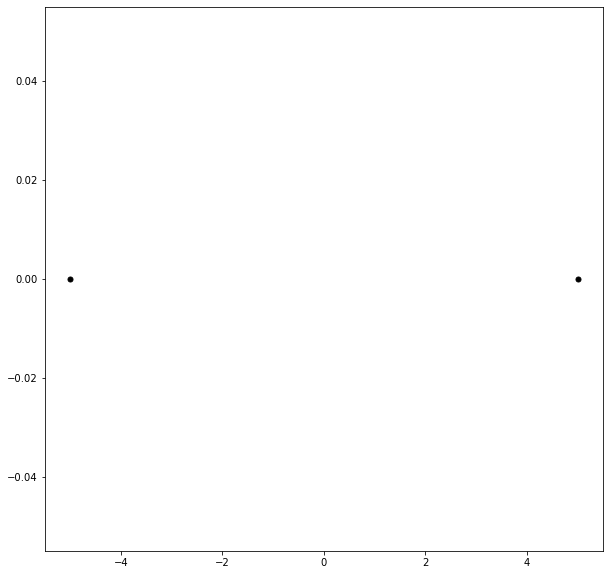

In [480]:
plt.scatter([x1, x2], [y1, y2], c = 'k', marker = '.', s = 100);

In [484]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

In [464]:
(((1*u.C)/(4 * np.pi * c.eps0)) * ((1)/((1*(u.m*1e-2))**2))).value

89875517922611.72

In [ ]:
N = 100
xspan = np.linspace(-50,50,N)
yspan = np.linspace(-50,50,N)
Emagmatrix = np.zeros([N,N])
Edirmatrix = np.zeros([N,N])
x1 = 5
y1 = 0
x2 = -5
y2 = 0
for xi, x in enumerate(xspan):
    for yi, y in enumerate(yspan):
        
        
        
        
        
        dist1 = np.sqrt(((x-x1)**2) + ((y-y1)**2))
        dist2 = np.sqrt(((x-x2)**2) + ((y-y2)**2))
        potential1 = (1*u.C)/(4 * c.eps0 * np.pi * dist1*(u.m*1e-2))
        potential2 = (-1*u.C)/(4 * c.eps0 * np.pi * dist2*(u.m*1e-2))
        matrix[xi, yi] = potential1.value + potential2.value